<a href="https://colab.research.google.com/github/adriano06-tech/introducao_a_clusterizacao/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando e analisando os dados

In [1]:
# Instalando biblioteca de plotagem dos graáficos

!pip install plotly==4.1.0

In [2]:
# Verificando se está corretamente instalado

!pip show plotly

Name: plotly
Version: 4.1.0
Summary: An open-source, interactive graphing library for Python
Home-page: https://plot.ly/python/
Author: Chris P
Author-email: chris@plot.ly
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: retrying, six
Required-by: cufflinks


In [3]:
# Importando a parte da biblioteca que realmente vamos utilizar

import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [4]:
# Importando os dados

uri = 'https://raw.githubusercontent.com/adriano06-tech/introducao_a_clusterizacao/main/Wine.csv'
df = pd.read_csv(uri)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
print(f'O dado possui {df.shape[0]} linhas e {df.shape[1]} colunas.')

O dado possui 178 linhas e 14 colunas.


In [6]:
# Traduzindo o DataFrame

df.rename(columns = {'Alcohol': 'Alcool',
                     'Ash': 'Po',
                    'Ash_Alcanity': 'Alcalinidade_po',
                     'Magnesium': 'Magnesio',
                    'Color_Intensity': 'Intensidade_de_cor',
                    'Nonflavanoid_Phenols': 'Fenois_nao_flavanoides',
                    'Total_Phenols': 'Total_fenois'}, inplace = True)

df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
# Obtendo informações estatísticas dos nosso dados

df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
# Instalando uma biblioteca para vermos de forma gráfica a correlação entre os dados

!pip install biokit=="0.4.2"

     |████████████████████████████████| 122kB 5.7MB/s 
     |████████████████████████████████| 51kB 5.2MB/s 
     |████████████████████████████████| 153kB 8.2MB/s 
     |████████████████████████████████| 235kB 11.9MB/s 
     |████████████████████████████████| 2.3MB 15.7MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
     |████████████████████████████████| 5.6MB 42.4MB/s 
     |████████████████████████████████| 256kB 52.1MB/s 
     |████████████████████████████████| 163kB 50.5MB/s 
  Created wheel for biokit: filename=biokit-0.4.2-cp37-none-any.whl size=139937 sha256=710825a99fba11cafe5f73216a1119ae8ee320bf23c7f4c9cc0a0d6953946fdd
  Stored in directory: /root/.cache/pip/wheels/fa/e5/53/6a4e58e47247fbdb79ee8c2d0cb5d7a685d0c89e3b52f31b93
  Created wheel for easydev: filename=easydev-0.11.0-cp37-none-any.whl size=64244 sha256=a8c4735f8d259706a3df65ca8b2511a0966939103dbf3645961dffdbb93c0049
  Stored in directory: /root/.cache/pip/wheels/17/69/b5/771949d8100a30aa33e4bc5d0ff77eced

In [9]:
# Verificando se foi instalada corretamente

!pip show biokit

Name: biokit
Version: 0.4.2
Summary: Access to Biological Web Services from Python
Home-page: ['http://pypi.python.org/pypi/biokit']
Author: Thomas Cokelaer
Author-email: cokelaer@gmail.com
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: pyyaml, pandas, scipy, colorlog, easydev, bioservices, suds-jurko, colormap, biopython, matplotlib, numpydoc
Required-by: 


In [10]:
# Importando biblioteca para a plotagem dos gráficos

from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


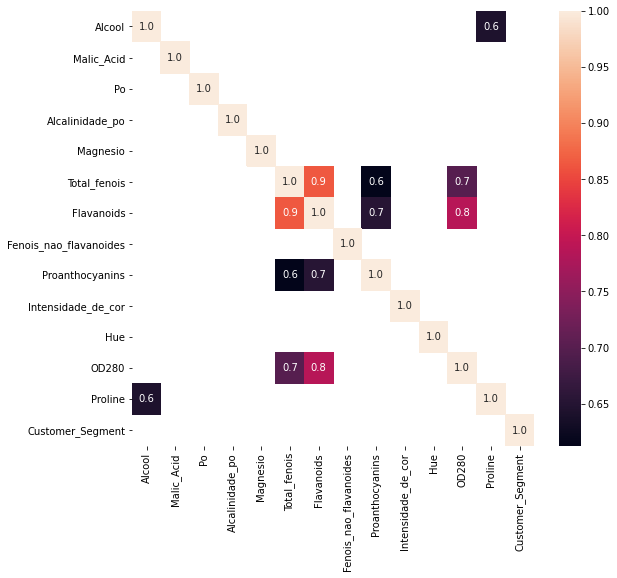

In [11]:
# Plotando nosso gráfico de correlação

matriz_corr = df.corr()

# Esse primeiro jeito me apresentou erro, por isso usei a biblioteca seaborn
    # corr_graf = corrplot.Corrplot(matriz_corr)
    # corr_graf.plot(upper = 'ellipse', fontsize = 'x-large')
    # fig.plt.cfg()
    # fig.set_size_inches(20, 12)
    # fig.show()
  
import seaborn as sns

plt.figure(figsize = (9, 8))
sns.heatmap(matriz_corr[matriz_corr > 0.6], annot = True, fmt = ".1f")

In [12]:
# Normalizando os dados na mão

atributos = df.columns

In [13]:
atributos

Index(['Alcool', 'Malic_Acid', 'Po', 'Alcalinidade_po', 'Magnesio',
       'Total_fenois', 'Flavanoids', 'Fenois_nao_flavanoides',
       'Proanthocyanins', 'Intensidade_de_cor', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [14]:
for atributo in atributos:
    df[atributo] = (df[atributo] - min(df[atributo])) / (max(df[atributo]) - min(df[atributo]))

In [15]:
df

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


In [16]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0


In [17]:
# Normalizando os dados com o sklearn

from sklearn import preprocessing

In [18]:
min_max_scaler = preprocessing.MinMaxScaler()

np_df = min_max_scaler.fit_transform(df)

In [19]:
df = pd.DataFrame(np_df, columns = atributos)

In [20]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446,0.469101
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613,0.387517
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702,0.000000
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097,0.500000
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# Testando função que retorna os nossos dados aos valores originais
# Obs: para funcionar você precisará importar a base de dados novamente

np_df = min_max_scaler.inverse_transform(df)
pd.DataFrame(np_df, columns = atributos)

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,0.0
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,0.0
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,0.0
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,0.0
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,1.0
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,1.0
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,1.0
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,1.0


# Clusterizando com o K-Means

In [22]:
from sklearn.cluster import KMeans

agrupador = KMeans(n_clusters = 4)

In [23]:
agrupador.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = agrupador.labels_

In [25]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 0 3 3 3 0 3 0 3 0 3
 3 0 3 0 3 3 3 3 0 0 3 3 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 0 3 0 3 0 0 0 3 3 3
 3 0 0 0 0 3 3 0 3 3 3 3 3 3 3 3 0 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                mode = 'markers',
                marker = dict(color = agrupador.labels_.astype(np.float)),
                text = labels))

In [27]:
agrupador = KMeans(n_clusters = 3)

agrupador.fit(df)

labels = agrupador.labels_

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'], y = df['Alcool'],
                mode = 'markers',
                marker = dict(color = agrupador.labels_.astype(np.float)),
                text = labels))

In [29]:
# Plotando o gráfico agora em 3d

fig = go.Figure()

fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = agrupador.labels_.astype(np.float)),
                           text = labels))

fig.show()

In [30]:
# Renomeando os eixos

fig.update_layout(scene = dict(
    xaxis_title  = 'Intensidade de cor',
    yaxis_title = 'Álcool',
    zaxis_title = 'Proline'
))

In [31]:
# Criando os centros de cada grupo

centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = atributos
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_fenois,Flavanoids,Fenois_nao_flavanoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline,Customer_Segment
0,0.711096,0.250000,0.587166,0.342955,0.400906,0.644080,0.557138,0.299371,0.470137,0.359386,0.476558,0.693590,0.595958,0.008333
1,0.322960,0.230939,0.469813,0.487823,0.261342,0.438831,0.366294,0.438337,0.383486,0.151704,0.468081,0.555396,0.167494,0.500000
2,0.558324,0.514721,0.574703,0.558700,0.315439,0.240746,0.096616,0.605314,0.237559,0.517343,0.167413,0.153921,0.249323,0.989796


In [32]:
# Adicionando os centros ao gráfico

fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))

fig.show()

# Clusterizando com o DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')

agrupador.fit(df)

DBSCAN(algorithm='auto', eps=1.31, leaf_size=30, metric='manhattan',
       metric_params=None, min_samples=15, n_jobs=None, p=None)

In [34]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

In [35]:
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

# Clusterizando com Mean shift

In [36]:
from sklearn.cluster import MeanShift

In [37]:
agrupador = MeanShift()
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [38]:
from sklearn.cluster import estimate_bandwidth

In [39]:
BW = estimate_bandwidth(df, quantile = 0.2)
agrupador = MeanShift(BW)
agrupador.fit(df)
agrupador.labels_


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

# Avaliando a clusterização com o coeficiente de silhueta

In [40]:
agrupador = KMeans(n_clusters = 5)
agrupador.fit(df)
labels = agrupador.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 4, 4, 3, 4,
       4, 4, 3, 4, 3, 4, 4, 2, 4, 3, 4, 3, 4, 2, 4, 4, 3, 3, 4, 4, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 3, 4, 2,
       2, 4, 3, 3, 4, 3, 4, 4, 3, 4, 2, 2, 2, 2, 2, 4, 4, 3, 4, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [41]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
                          x = df['Intensidade_de_cor'],
                          y = df['Alcool'],
                          z = df['Proline'],
                          mode = 'markers',
                          marker = dict(color = labels.astype(np.float)),
                          text = labels)
            )
              
fig.show()

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
faixa_n_clusters = [i for i in range(2, 10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [44]:
from sklearn.cluster import KMeans
valores_silhueta = []

for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters = k)
    labels = agrupador.fit_predict(df)
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)

In [45]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = 'Valores de silhueta médios',
    xaxis_title = 'Número de clusters',
    yaxis_title = 'Média de silhueta'
)
fig.show()

In [46]:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

In [47]:
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
    bandwidth = estimate_bandwidth(df, quantile = quantil)
    agrupador = MeanShift(bandwidth = bandwidth)
    labels = agrupador.fit_predict(df)
    if len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1:
        media_silhueta = silhouette_score(df, labels)
        valores_silhueta.append(media_silhueta)
        quantil_plot.append(quantil)

In [48]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantil_plot, y = valores_silhueta))
fig.update_layout(dict(xaxis_title = 'Quantil',
                      yaxis_title = 'Média silhueta'))
fig.show()

In [49]:
# Comparando os três modelos de clusterização

from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [50]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_dbscan = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_dbscan = agrupador_dbscan.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print('Labels KMeans: ', labels_kmeans, '\n\n')
print('Labels DBSCAN: ', labels_dbscan, '\n\n')
print('Labels MeanShift: ', labels_meanshift, '\n\n')

Labels KMeans:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1] 


Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1 -1 -1  0
  0 -1  0  0  0 -1 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0 -1  0  0 -1  0
  0 -1 -1  0 -1  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1] 


Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [51]:
print('O coeficiente de silhueta do K-Means é: ', silhouette_score(df, labels_kmeans))
print('O coeficiente de silhueta do DBSCAN é: ', silhouette_score(df, labels_dbscan))
print('O coeficiente de silhueta do MeanShift é: ', silhouette_score(df, labels_meanshift))

O coeficiente de silhueta do K-Means é:  0.36950618492736303
O coeficiente de silhueta do DBSCAN é:  0.3016232115094375
O coeficiente de silhueta do MeanShift é:  0.3059152866115628
